In [3]:
"""
Variable Distributions

This notebook explores the distributions of core clustering variables,derived clinical categories, 
and demographic characteristics in the final analysis ready dataset.

Author: Hajar Cherrouk
"""

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sys.path.append('../../')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
#load data
data_path = "../../data/processed/nhanes_metabolic_analysis_ready.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"File not found: {data_path}")

df = pd.read_csv(data_path)

print("NHANES Metabolic phenotypes: Variable distributions")
print(f"\nDataset loaded: {df.shape[0]:,} participants × {df.shape[1]} variables")
print(f"File: {data_path}")
print("\nSetup complete")


NHANES Metabolic phenotypes: Variable distributions

Dataset loaded: 3,047 participants × 42 variables
File: ../../data/processed/nhanes_metabolic_analysis_ready.csv

Setup complete


In [4]:
# display basic information
print("\n dataset overview")
# core variables summary
core_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST']
print("\nCore Clustering Variables:")
for var in core_vars:
    print(f"  • {var}")

# demographic variables
demo_vars = ['RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2']
print("\nDemographic Variables:")
for var in demo_vars:
    print(f"  • {var}")

# derived variables
derived_vars = ['age_group', 'sex_label', 'bmi_category', 
                'glucose_category', 'triglycerides_category', 'waist_risk']
print("\nDerived Variables:")
for var in derived_vars:
    print(f"  • {var}")

# check for any missing values in core variables (should be 0)
print("\nMissing Values Check (Core Variables):" )
for var in core_vars:
    n_missing = df[var].isna().sum()
    print(f"  {var:12s}: {n_missing} missing")

if df[core_vars].isna().sum().sum() == 0:
    print("\n No missing values in core variables ")#as expeted


 dataset overview

Core Clustering Variables:
  • LBXGLU
  • LBXTLG
  • BMXWAIST

Demographic Variables:
  • RIDAGEYR
  • RIAGENDR
  • RIDRETH3
  • DMDEDUC2

Derived Variables:
  • age_group
  • sex_label
  • bmi_category
  • glucose_category
  • triglycerides_category
  • waist_risk

Missing Values Check (Core Variables):
  LBXGLU      : 0 missing
  LBXTLG      : 0 missing
  BMXWAIST    : 0 missing

 No missing values in core variables 


In [5]:
# comprehensive descriptive statistics
print("DESCRIPTIVE STATISTICS: CONTINUOUS VARIABLES")
continuous_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST', 'RIDAGEYR', 'BMXBMI', 'BMXWT', 'BMXHT']

# calculate extended statistics
stats_dict = {}
for var in continuous_vars:
    if var in df.columns:
        stats_dict[var] = {
            'N': df[var].notna().sum(),
            'Mean': df[var].mean(),
            'SD': df[var].std(),
            'Median': df[var].median(),
            'Q1': df[var].quantile(0.25),
            'Q3': df[var].quantile(0.75),
            'Min': df[var].min(),
            'Max': df[var].max(),
            'Skewness': df[var].skew(),
            'Kurtosis': df[var].kurtosis()
        }

stats_df = pd.DataFrame(stats_dict).T
print("\n" + stats_df.round(2).to_string())

# save statistics table
stats_df.round(2).to_csv('../../results/tables/descriptive_statistics.csv')
print("\n Table saved to: results/tables/descriptive_statistics.csv")


DESCRIPTIVE STATISTICS - CONTINUOUS VARIABLES

               N    Mean     SD  Median     Q1      Q3    Min     Max  Skewness  Kurtosis
LBXGLU    3047.0  108.97  33.29   101.0   94.0  110.00   59.0   561.0      4.71     32.80
LBXTLG    3047.0  120.05  87.54    99.0   73.0  141.00   25.0  1745.0      6.25     82.94
BMXWAIST  3047.0  100.41  16.80    99.0   88.3  110.50   60.0   177.2      0.58      0.44
RIDAGEYR  3047.0   53.03  17.84    57.0   38.0   68.00   18.0    80.0     -0.32     -1.04
BMXBMI    3039.0   29.47   7.04    28.2   24.5   33.15   14.1    69.9      1.16      2.32
BMXWT     3042.0   82.70  21.58    79.5   67.2   94.70   32.6   191.5      0.97      1.45
BMXHT     3043.0  167.30   9.98   166.8  160.2  174.50  133.0   198.1      0.13     -0.39

✓ Table saved to: results/tables/descriptive_statistics.csv


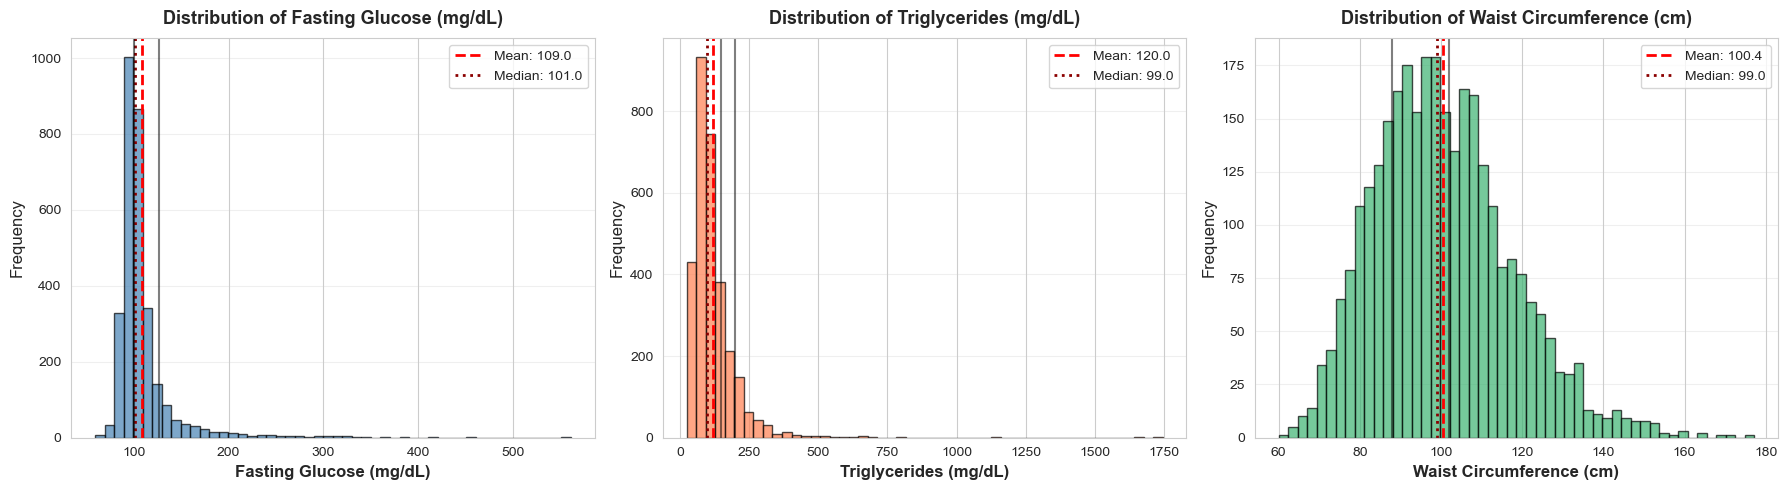

 Figure saved to: results/figures/core_variables_distributions.png


In [6]:
# create individual histograms for core clustering variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_specs = [
    ('LBXGLU', 'Fasting Glucose (mg/dL)', 'steelblue', [100, 126]),
    ('LBXTLG', 'Triglycerides (mg/dL)', 'coral', [150, 200]),
    ('BMXWAIST', 'Waist Circumference (cm)', 'mediumseagreen', [88, 102])
]

for idx, (var, title, color, thresholds) in enumerate(plot_specs):
    ax = axes[idx]
    #plot hist
    ax.hist(df[var], bins=50, color=color, alpha=0.7, edgecolor='black')
    #add mean and median lines
    mean_val = df[var].mean()
    median_val = df[var].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='darkred', linestyle=':', linewidth=2, 
               label=f'Median: {median_val:.1f}')
    #add clinical threshodls
    for threshold in thresholds:
        ax.axvline(threshold, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
    #formatting
    ax.set_xlabel(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Distribution of {title}', fontsize=13, fontweight='bold', pad=10)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../../results/figures/core_variables_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to: results/figures/core_variables_distributions.png")

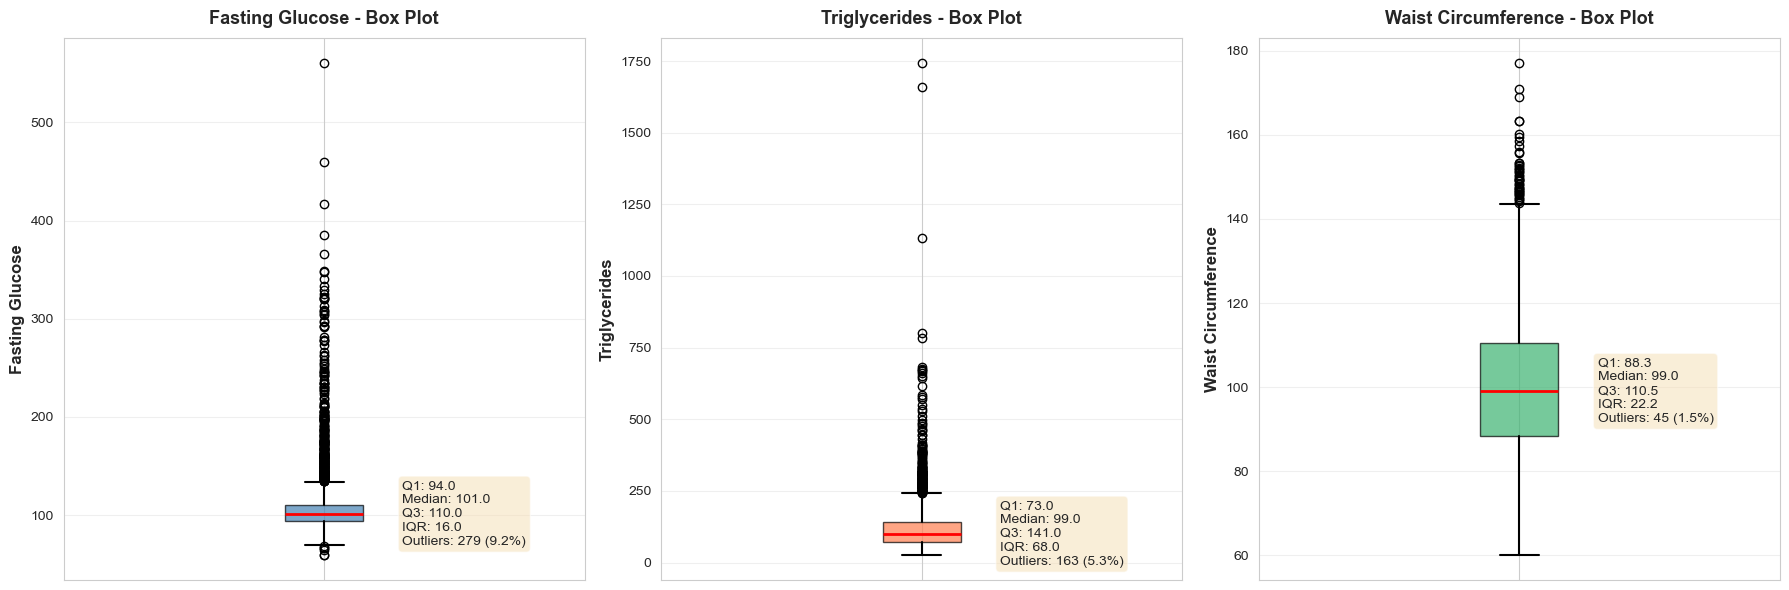

Figure saved 


In [7]:
# nbox plots (to identify outliers)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (var, title, color) in enumerate([
    ('LBXGLU', 'Fasting Glucose', 'steelblue'),
    ('LBXTLG', 'Triglycerides', 'coral'),
    ('BMXWAIST', 'Waist Circumference', 'mediumseagreen')
]):
    ax = axes[idx]
    
    # create box plot
    bp = ax.boxplot(df[var].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor=color, alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5))
    
    # calculate outlier statistics
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
    pct_outliers = (n_outliers / len(df)) * 100
    
    # add statistics text
    stats_text = (f'Q1: {Q1:.1f}\n'
                  f'Median: {df[var].median():.1f}\n'
                  f'Q3: {Q3:.1f}\n'
                  f'IQR: {IQR:.1f}\n'
                  f'Outliers: {n_outliers} ({pct_outliers:.1f}%)')
    
    ax.text(1.15, df[var].median(), stats_text, fontsize=10,
            verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_ylabel(title, fontsize=12, fontweight='bold')
    ax.set_title(f'{title} - Box Plot', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels([''])

plt.tight_layout()
plt.savefig('../../results/figures/core_variables_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved ")

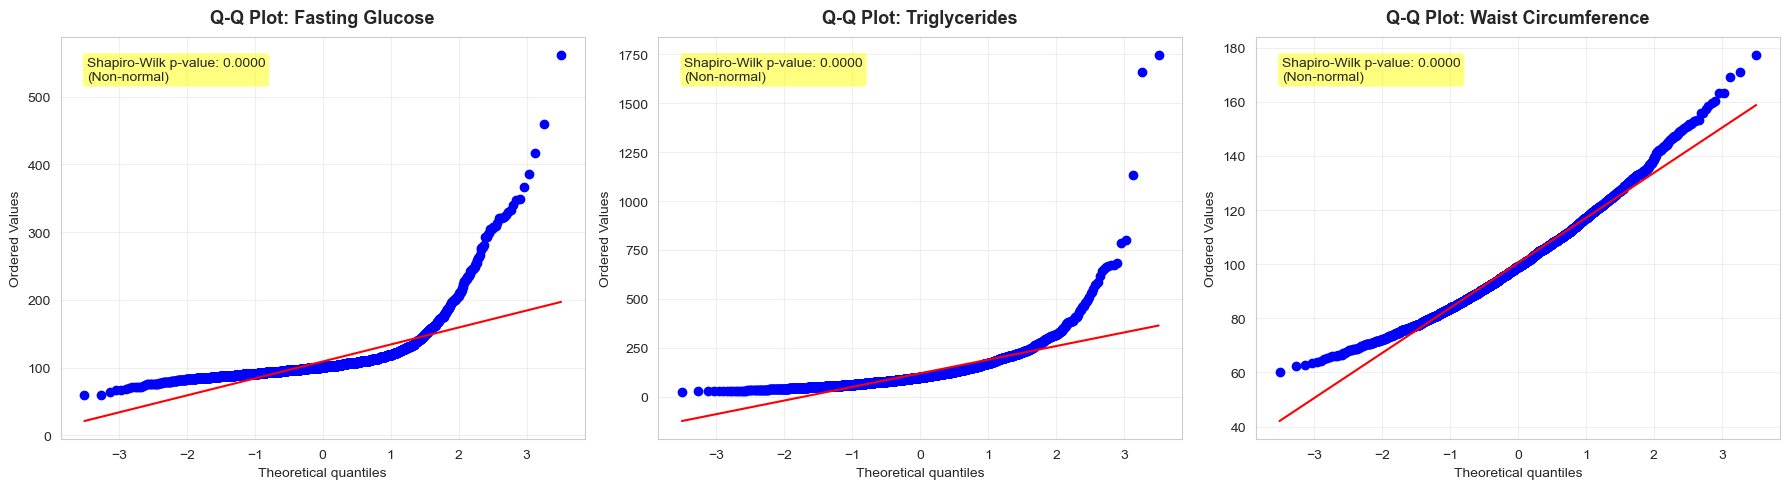

 Figure saved to: results/figures/normality_qqplots.png


In [8]:
# Q-Q plots (normality assessment
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (var, title) in enumerate([('LBXGLU', 'Fasting Glucose'),('LBXTLG', 'Triglycerides'), 
                                    ('BMXWAIST', 'Waist Circumference')]):
    ax = axes[idx]
    
    stats.probplot(df[var].dropna(), dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {title}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(alpha=0.3)
    #add normality test results
    statistic, p_value = stats.shapiro(df[var].dropna().sample(min(5000, len(df))))
    normality_text = f'Shapiro-Wilk p-value: {p_value:.4f}'
    if p_value < 0.05:
        normality_text += '\n(Non-normal)'
    else:
        normality_text += '\n(Normal)'
    
    ax.text(0.05, 0.95, normality_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('../../results/figures/normality_qqplots.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to: results/figures/normality_qqplots.png")

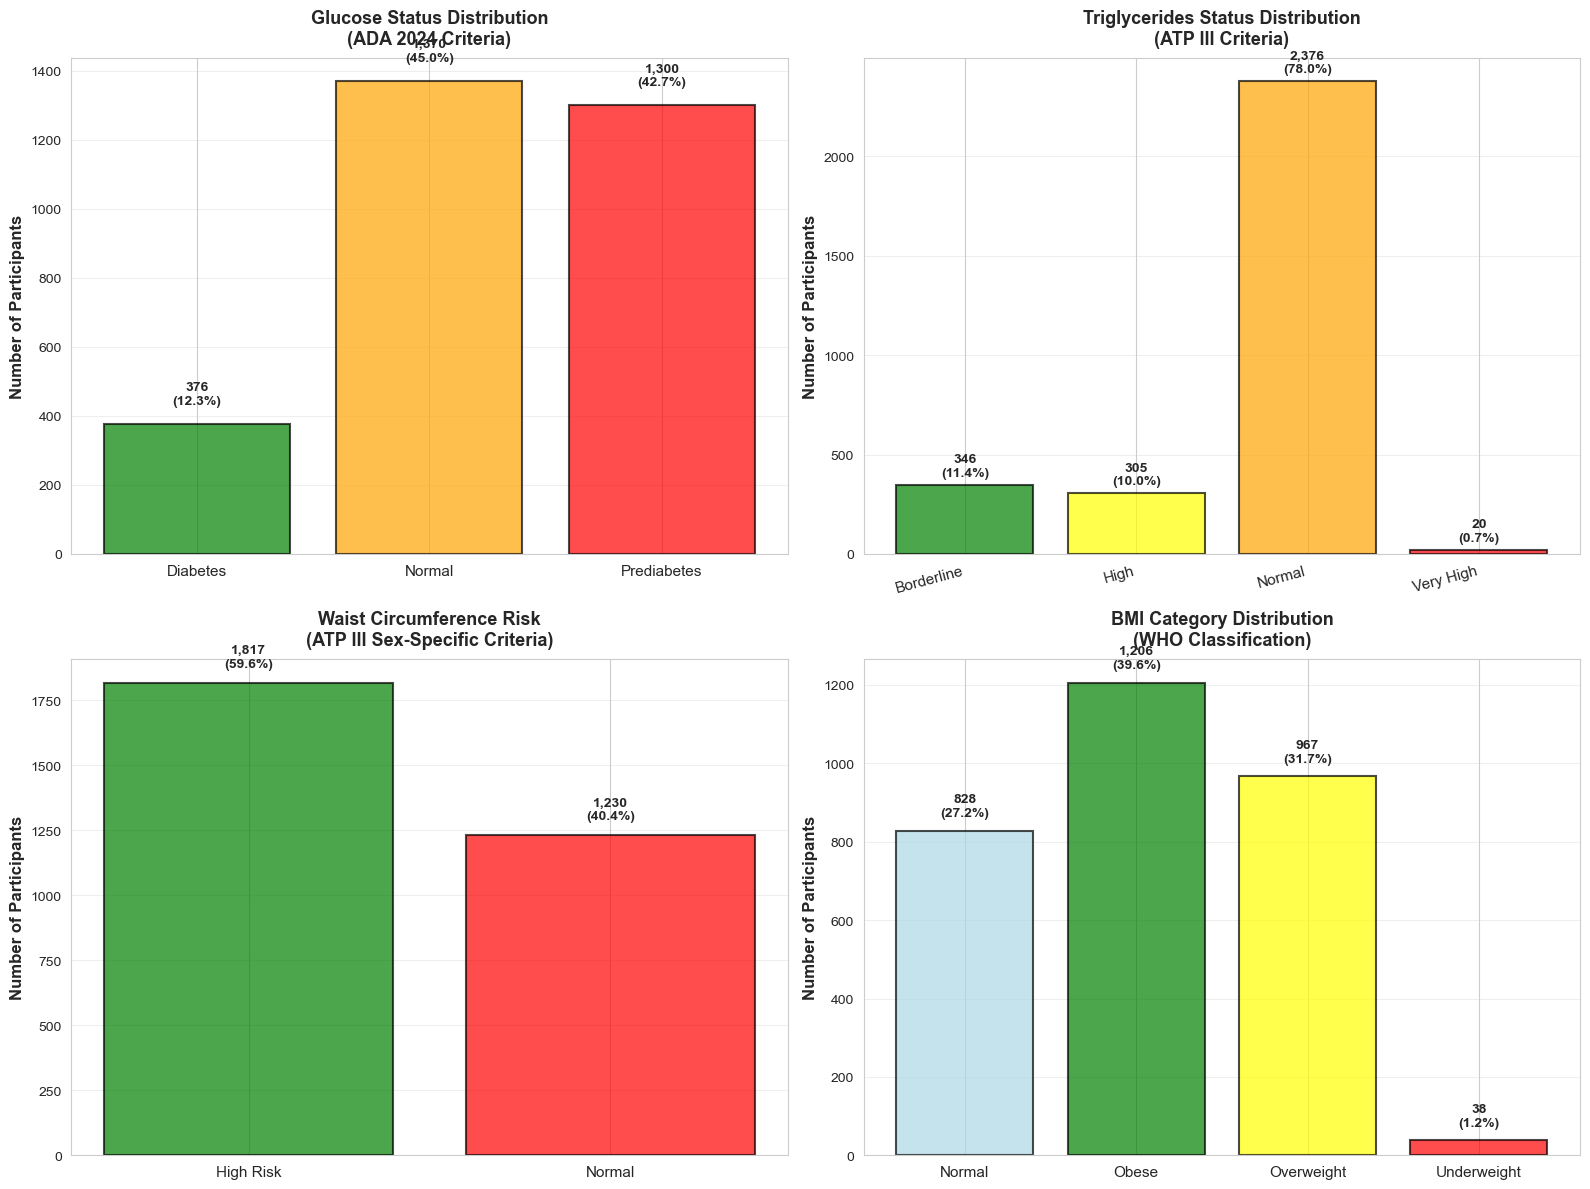

Figure saved to: results/figures/clinical_categories_distribution.png


In [9]:
# visualize derived clinical categories
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Glucose categories
ax = axes[0, 0]
glucose_counts = df['glucose_category'].value_counts().sort_index()
colors_glucose = ['green', 'orange', 'red']
ax.bar(range(len(glucose_counts)), glucose_counts.values, 
       color=colors_glucose, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(glucose_counts)))
ax.set_xticklabels(glucose_counts.index, fontsize=11)
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Glucose Status Distribution\n(ADA 2024 Criteria)', 
             fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

# add percentages
for i, (cat, count) in enumerate(glucose_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 50, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Triglycerides categories
ax = axes[0, 1]
trig_counts = df['triglycerides_category'].value_counts().sort_index()
colors_trig = ['green', 'yellow', 'orange', 'red']
ax.bar(range(len(trig_counts)), trig_counts.values, 
       color=colors_trig, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(trig_counts)))
ax.set_xticklabels(trig_counts.index, fontsize=11, rotation=15, ha='right')
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Triglycerides Status Distribution\n(ATP III Criteria)', 
             fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

for i, (cat, count) in enumerate(trig_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 30, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Waist risk categories
ax = axes[1, 0]
waist_counts = df['waist_risk'].value_counts().sort_index()
colors_waist = ['green', 'red']
ax.bar(range(len(waist_counts)), waist_counts.values, 
       color=colors_waist, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(waist_counts)))
ax.set_xticklabels(waist_counts.index, fontsize=11)
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Waist Circumference Risk\n(ATP III Sex-Specific Criteria)', 
             fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

for i, (cat, count) in enumerate(waist_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 50, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# BMI categories
ax = axes[1, 1]
bmi_counts = df['bmi_category'].value_counts().sort_index()
colors_bmi = ['lightblue', 'green', 'yellow', 'red']
ax.bar(range(len(bmi_counts)), bmi_counts.values, 
       color=colors_bmi, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(bmi_counts)))
ax.set_xticklabels(bmi_counts.index, fontsize=11)
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('BMI Category Distribution\n(WHO Classification)', 
             fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

for i, (cat, count) in enumerate(bmi_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 30, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../../results/figures/clinical_categories_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/clinical_categories_distribution.png")

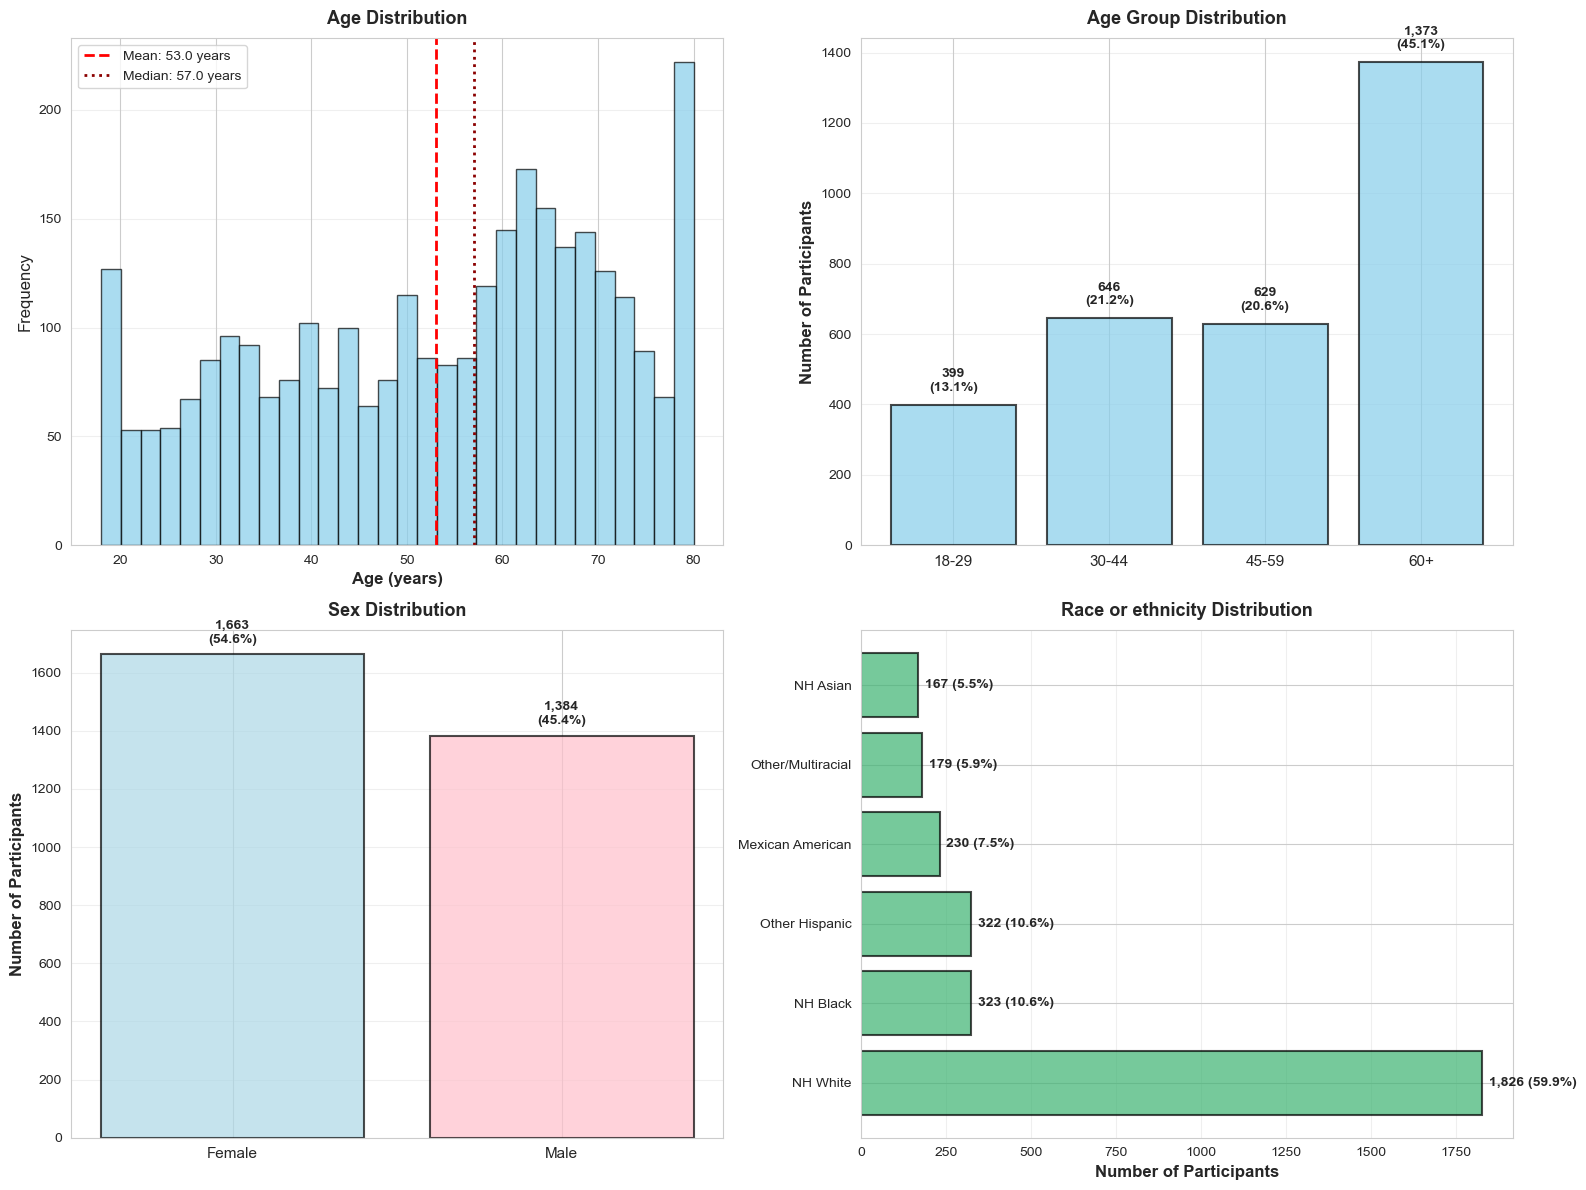

Figure saved to: results/figures/demographics_distribution.png


In [10]:
# demographic char
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# age distribution
ax = axes[0, 0]
ax.hist(df['RIDAGEYR'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax.axvline(df['RIDAGEYR'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["RIDAGEYR"].mean():.1f} years')
ax.axvline(df['RIDAGEYR'].median(), color='darkred', linestyle=':', linewidth=2,
           label=f'Median: {df["RIDAGEYR"].median():.1f} years')
ax.set_xlabel('Age (years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Age Distribution', fontsize=13, fontweight='bold', pad=10)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# age groups
ax = axes[0, 1]
age_group_counts = df['age_group'].value_counts().sort_index()
ax.bar(range(len(age_group_counts)), age_group_counts.values,
       color='skyblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(age_group_counts)))
ax.set_xticklabels(age_group_counts.index, fontsize=11)
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Age Group Distribution', fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

for i, (cat, count) in enumerate(age_group_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 30, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# sex distribution
ax = axes[1, 0]
sex_counts = df['sex_label'].value_counts()
colors_sex = ['lightblue', 'pink']
ax.bar(range(len(sex_counts)), sex_counts.values,
       color=colors_sex, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(sex_counts)))
ax.set_xticklabels(sex_counts.index, fontsize=11)
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Sex Distribution', fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='y', alpha=0.3)

for i, (cat, count) in enumerate(sex_counts.items()):
    pct = count / len(df) * 100
    ax.text(i, count + 30, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Race or ethnicity distribution
ax = axes[1, 1]
# map RIDRETH3 codes to labels
race_mapping = {1: 'Mexican American', 2: 'Other Hispanic', 3: 'NH White', 4: 'NH Black', 6: 'NH Asian', 7: 'Other/Multiracial'}

df['race_label'] = df['RIDRETH3'].map(race_mapping)
race_counts = df['race_label'].value_counts()
ax.barh(range(len(race_counts)), race_counts.values,
        color='mediumseagreen', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_yticks(range(len(race_counts)))
ax.set_yticklabels(race_counts.index, fontsize=10)
ax.set_xlabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Race or ethnicity Distribution', fontsize=13, fontweight='bold', pad=10)
ax.grid(axis='x', alpha=0.3)

for i, (cat, count) in enumerate(race_counts.items()):
    pct = count / len(df) * 100
    ax.text(count + 20, i, f'{count:,} ({pct:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../../results/figures/demographics_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/demographics_distribution.png")

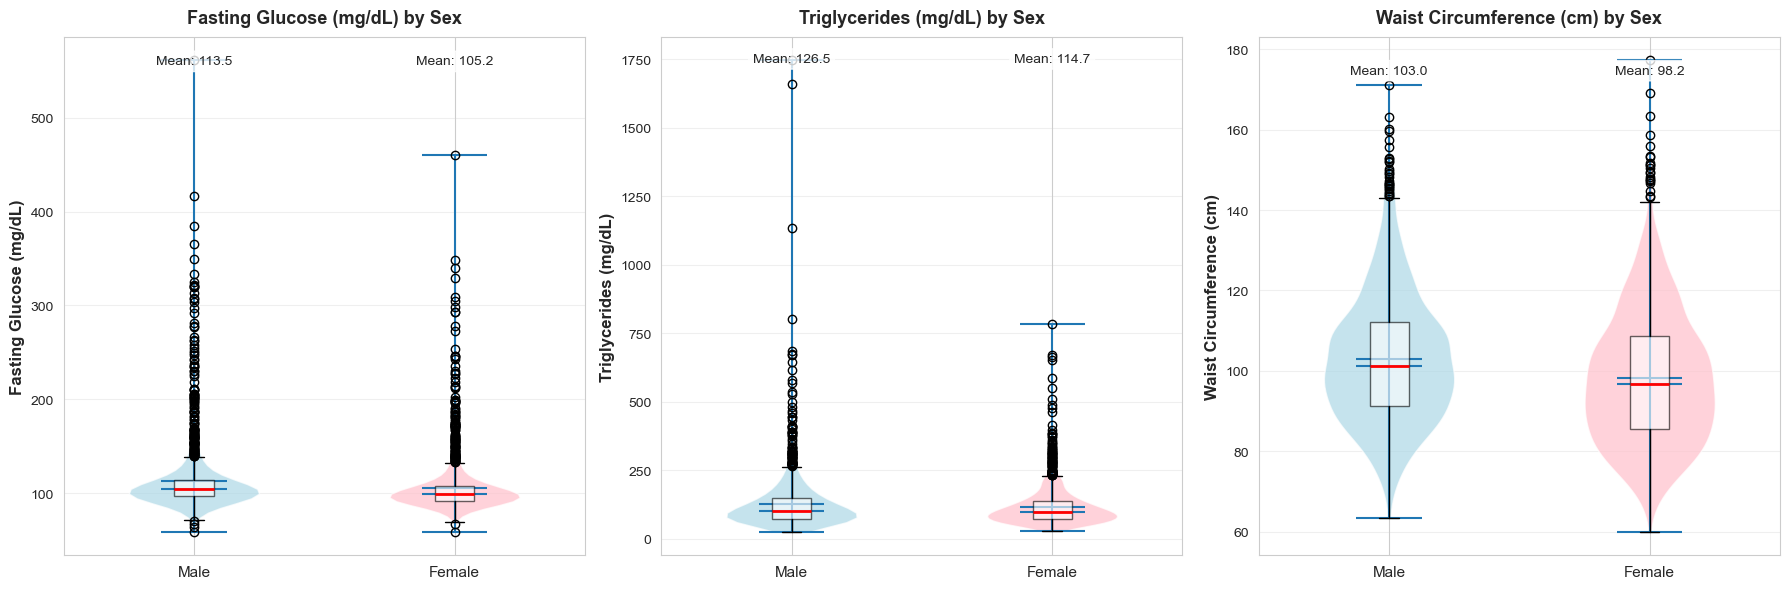

Figure saved


In [11]:
# analyze core variables stratified by sex
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

core_vars_plot = [
    ('LBXGLU', 'Fasting Glucose (mg/dL)'),
    ('LBXTLG', 'Triglycerides (mg/dL)'),
    ('BMXWAIST', 'Waist Circumference (cm)')
]

for idx, (var, title) in enumerate(core_vars_plot):
    ax = axes[idx]
    
    # create violin plots by sex
    data_male = df[df['sex_label'] == 'Male'][var].dropna()
    data_female = df[df['sex_label'] == 'Female'][var].dropna()
    
    parts = ax.violinplot([data_male, data_female], 
                           positions=[1, 2],
                           showmeans=True, showmedians=True)
    
    # color the violins
    colors = ['lightblue', 'pink']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    # add box plots overlay
    bp = ax.boxplot([data_male, data_female], 
                     positions=[1, 2],
                     widths=0.15,
                     patch_artist=True,
                     boxprops=dict(facecolor='white', alpha=0.6),
                     medianprops=dict(color='red', linewidth=2))
    
    # set labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Male', 'Female'], fontsize=11)
    ax.set_ylabel(title, fontsize=12, fontweight='bold')
    ax.set_title(f'{title} by Sex', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='y', alpha=0.3)
    
    # add mean values as text
    mean_m = data_male.mean()
    mean_f = data_female.mean()
    ax.text(1, ax.get_ylim()[1]*0.95, f'Mean: {mean_m:.1f}', 
            ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax.text(2, ax.get_ylim()[1]*0.95, f'Mean: {mean_f:.1f}', 
            ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('../../results/figures/core_variables_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved")

In [13]:
# create comprehensive summary table
summary_data = []

# core variables
for var, var_name in [('LBXGLU', 'Glucose'), ('LBXTLG', 'Triglycerides'), ('BMXWAIST', 'Waist Circ.')]:
    summary_data.append({
        'Variable': var_name,
        'N': len(df),
        'Mean (SD)': f"{df[var].mean():.1f} ({df[var].std():.1f})",
        'Median [IQR]': f"{df[var].median():.1f} [{df[var].quantile(0.25):.1f}-{df[var].quantile(0.75):.1f}]",
        'Range': f"{df[var].min():.1f}-{df[var].max():.1f}"
    })

# clinical categories
for cat_var, cat_name in [ ('glucose_category', 'Glucose Status'),('triglycerides_category', 'Triglycerides Status'),
                          ('waist_risk', 'Waist Risk')]:
    cats = df[cat_var].value_counts()
    cat_str = ', '.join([f"{cat}: {count} ({count/len(df)*100:.1f}%)" 
                         for cat, count in cats.items()])
    summary_data.append({ 'Variable': cat_name, 'N': len(df),'Mean (SD)': '—','Median [IQR]': '—', 'Range': cat_str})

summary_table = pd.DataFrame(summary_data)

print("\n variable distribution summary table")
print(summary_table.to_string(index=False))
summary_table.to_csv('../../results/tables/variable_distribution_summary.csv', index=False)
print("\n✓ Table saved to: results/tables/variable_distribution_summary.csv")


 variable distribution summary table
            Variable    N    Mean (SD)       Median [IQR]                                                                                  Range
             Glucose 3047 109.0 (33.3) 101.0 [94.0-110.0]                                                                             59.0-561.0
       Triglycerides 3047 120.0 (87.5)  99.0 [73.0-141.0]                                                                            25.0-1745.0
         Waist Circ. 3047 100.4 (16.8)  99.0 [88.3-110.5]                                                                             60.0-177.2
      Glucose Status 3047            —                  —                 Normal: 1370 (45.0%), Prediabetes: 1300 (42.7%), Diabetes: 376 (12.3%)
Triglycerides Status 3047            —                  — Normal: 2376 (78.0%), Borderline: 346 (11.4%), High: 305 (10.0%), Very High: 20 (0.7%)
          Waist Risk 3047            —                  —                                   

In [14]:

print("KEY FINDINGS: Variable distribution")

print(f"\n Sample characteristics (N = {len(df):,})")
print(f"   - Age: {df['RIDAGEYR'].mean():.1f} ± {df['RIDAGEYR'].std():.1f} years")
print(f"   - Sex: {(df['sex_label']=='Male').sum():,} Male ({(df['sex_label']=='Male').sum()/len(df)*100:.1f}%), "
      f"{(df['sex_label']=='Female').sum():,} Female ({(df['sex_label']=='Female').sum()/len(df)*100:.1f}%)")

print(f"\n Core variables (Mean ± SD):")
print(f"   • Fasting Glucose:    {df['LBXGLU'].mean():.1f} ± {df['LBXGLU'].std():.1f} mg/dL")
print(f"   • Triglycerides:      {df['LBXTLG'].mean():.1f} ± {df['LBXTLG'].std():.1f} mg/dL")
print(f"   • Waist Circumference: {df['BMXWAIST'].mean():.1f} ± {df['BMXWAIST'].std():.1f} cm")

# Clinical categories
glucose_cats = df['glucose_category'].value_counts()
print(f"\n Glucos Status:")
for cat, count in glucose_cats.items():
    print(f"   - {cat:15s}: {count:>5,} ({count/len(df)*100:>5.1f}%)")

trig_cats = df['triglycerides_category'].value_counts()
print(f"\n Triglycerides Status:")
for cat, count in trig_cats.items():
    print(f"   - {cat:15s}: {count:>5,} ({count/len(df)*100:>5.1f}%)")

waist_cats = df['waist_risk'].value_counts()
print(f"\n Waist Circumference risk:")
for cat, count in waist_cats.items():
    print(f"   - {cat:15s}: {count:>5,} ({count/len(df)*100:>5.1f}%)")

# Distribution notes
print(f"\n Distribution characteristics:")
for var, name in [('LBXGLU', 'Glucose'), ('LBXTLG', 'Triglycerides'), ('BMXWAIST', 'Waist Circ.')]:
    skew = df[var].skew()
    kurt = df[var].kurtosis()
    print(f"   - {name:18s}: Skewness = {skew:>6.2f}, Kurtosis = {kurt:>6.2f}")
    if abs(skew) > 1:
        print(f"     {'':20s}→ Highly skewed, may need transformation for clustering")


KEY FINDINGS: Variable distribution

 Sample characteristics (N = 3,047)
   - Age: 53.0 ± 17.8 years
   - Sex: 1,384 Male (45.4%), 1,663 Female (54.6%)

 Core variables (Mean ± SD):
   • Fasting Glucose:    109.0 ± 33.3 mg/dL
   • Triglycerides:      120.0 ± 87.5 mg/dL
   • Waist Circumference: 100.4 ± 16.8 cm

 Glucos Status:
   - Normal         : 1,370 ( 45.0%)
   - Prediabetes    : 1,300 ( 42.7%)
   - Diabetes       :   376 ( 12.3%)

 Triglycerides Status:
   - Normal         : 2,376 ( 78.0%)
   - Borderline     :   346 ( 11.4%)
   - High           :   305 ( 10.0%)
   - Very High      :    20 (  0.7%)

 Waist Circumference risk:
   - High Risk      : 1,817 ( 59.6%)
   - Normal         : 1,230 ( 40.4%)

 Distribution characteristics:
   - Glucose           : Skewness =   4.71, Kurtosis =  32.80
                         → Highly skewed, may need transformation for clustering
   - Triglycerides     : Skewness =   6.25, Kurtosis =  82.94
                         → Highly skewed, may nee